In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

2.12.0


# Загрузка датасета IMDB

In [2]:
VOCAB_SIZE = 10000 # Количество слов в словаре

(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(num_words=VOCAB_SIZE)

print(f"Training entries: {len(train_data)}")
print('=' * 50)
print(f"Test entries: {len(test_data)}")
print('=' * 50)
print(f"Length examples: {[len(train_data[0]), len(train_data[1])]}")
print('=' * 50)
print(f"Entry example: {train_data[0]}")

Training entries: 25000
Test entries: 25000
Length examples: [218, 189]
Entry example: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 

# Создание функций decode_review и encode_review
Создадим функции для конвертирования индексного представления отзыва в словестный(decode_review) и наоборот (encode_review).
Функции будут использовать словари word2idx и idx2word (отображение слова в индекс и индекса в слово)
Кроме обычных слов в словаре будут содержаться специальные. слова (токены): \<PAD>, \<START>, \<UNKNOWN>

In [3]:
word_index = tf.keras.datasets.imdb.get_word_index()

word_index = {k: (v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# последовательность индексов в текст
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# текст в последовательность индексов
def encode_review(text):
    words = text.lower().split()
    words = ['<START>'] + words
    idxs = [word_index.get(word, word_index['<UNKNOWN>']) for word in words]
    return idxs

print(f'Example of a decoded review: \n{decode_review(train_data[0])}')

Example of a decoded review: 
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNKNOWN> is an amazing actor and now the same being director <UNKNOWN> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNKNOWN> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNKNOWN> to the two little boy's that played the <UNKNOWN> of norman and paul they were just brilliant children are often left out of the <UNKNOWN> list i think because the stars that play them all grown up are such a big profile for the whole film but th

# Проверка функций decode_review и encode_review
Протестируем функции decode_review и encode_review

In [4]:
text = 'hello world'

print(encode_review(text))
print(decode_review(encode_review(text)))

[1, 4825, 182]
<START> hello world


# Приведение всех цепочек в датасете к одной длине с помощью паддинга
Одна цепочка это один отзыв. А отзывы могут быть различной длины.
Так как нам будет необходимо собирать из отзывов батчи (группы цепочек), удобно все отзывы привести к одной длине с помощью
паддинга в конце (добавления элементов \<PAD>).

In [7]:
MAX_SEQ_LEN = 256

train_data = tf.keras.preprocessing.sequence.pad_sequences(
    train_data,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=MAX_SEQ_LEN)

test_data = tf.keras.preprocessing.sequence.pad_sequences(
    test_data,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=MAX_SEQ_LEN)

print(f"Length examples: {[len(train_data[0]), len(train_data[1])]}")
print('=' * 50)
print(f"Entry example: {train_data[0]}")

Length examples: [256, 256]
Entry example: [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   1

# Создание модели

In [8]:
EMB_SIZE = 16 # Размер векторного представлени (эмбеддинга)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


# Подготовка модели к обучению

In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
             )

# Разбиение датасета на обучающий и валидационный

In [10]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [11]:
BATCH_SIZE = 512
NUM_EPOCHS = 20

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=NUM_EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20


2023-06-18 11:10:03.762236: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 13s 254ms/step - loss: 0.6924 - acc: 0.5947 - val_loss: 0.6909 - val_acc: 0.6516
Epoch 2/20
30/30 [==============================] - 7s 219ms/step - loss: 0.6876 - acc: 0.7169 - val_loss: 0.6836 - val_acc: 0.7312
Epoch 3/20
30/30 [==============================] - 7s 222ms/step - loss: 0.6764 - acc: 0.7377 - val_loss: 0.6694 - val_acc: 0.7456
Epoch 4/20
30/30 [==============================] - 7s 219ms/step - loss: 0.6562 - acc: 0.7695 - val_loss: 0.6458 - val_acc: 0.7634
Epoch 5/20
30/30 [==============================] - 6s 217ms/step - loss: 0.6251 - acc: 0.7917 - val_loss: 0.6122 - val_acc: 0.7797
Epoch 6/20
30/30 [==============================] - 7s 219ms/step - loss: 0.5846 - acc: 0.8083 - val_loss: 0.5718 - val_acc: 0.7970
Epoch 7/20
30/30 [==============================] - 7s 219ms/step - loss: 0.5376 - acc: 0.8264 - val_loss: 0.5278 - val_acc: 0.8188
Epoch 8/20
30/30 [==============================] - 7s 218ms/step - loss: 0.4890 - acc

# Оценка качества на тестовом датасете

In [12]:
results = model.evaluate(test_data, test_labels)

print(f'Test loss: {results[0]:.4f}')
print(f'Test accuracy: {results[1]*100:.2f}')

782/782 [==============================] - 8s 10ms/step - loss: 0.3087 - acc: 0.8740
Test loss: 0.3087
Test accuracy: 87.40


# Графики лосса и точности на обучающем и валидационном датасетах

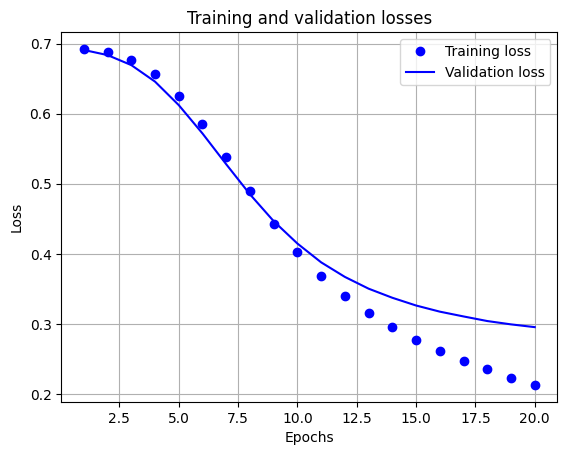

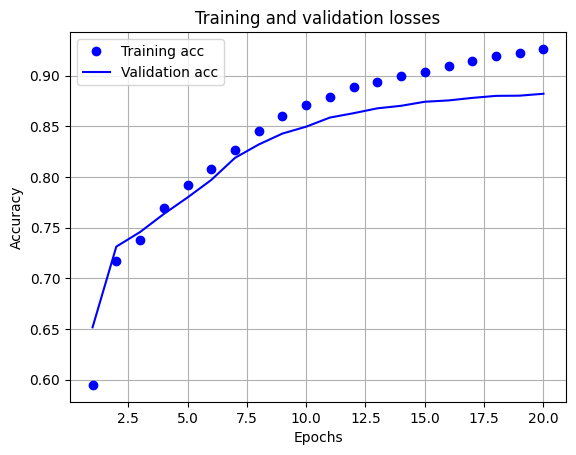

In [14]:
epochs = range(1, len(history.history['acc']) + 1)

plt.figure()
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, history.history['acc'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

 # Тестирование обученной модели на новой последовательности
 Проверим работу модели на собственном отзыве.

In [16]:
# text = 'It was a really good movie it was so fantastic'
text = 'It was a really horrible movie it was so shit'

encoded = encode_review(text)
prediction = model.predict(np.array(encoded)[None, :])[0, 0]

print(prediction)
print('Positive' if prediction > .5 else 'Negative')

1/1 [==============================] - 0s 138ms/step
0.001921664
Negative
